In [46]:
from adam import ADAM
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap
import numpy as np
from qiskit.quantum_info import Statevector
from math import log

import matplotlib.pyplot as plt

In [47]:
file1 = 'x1_trainData.npy'
x1_train = np.load(file1, allow_pickle=True)

In [48]:
x1_train.shape

(50, 2)

In [49]:
file2 = 'x2_trainData.npy'
x2_train = np.load(file1, allow_pickle=True)

In [50]:
x2_train.shape

(50, 2)

In [51]:
# size of training data set
training_size = 100
# dimension of data sets
n = 2
#from sklearn import datasets
#from sklearn import preprocessing
iris = datasets.load_iris()
# load iris and normalise
#x = preprocessing.normalize(iris.data)
#x1_train = x[0:49, :] # class A
#x2_train = x[50:99, :] # class B
training_input = {'A':x1_train, 'B':x2_train}
class_labels = ['A', 'B']

In [53]:
sv = Statevector.from_label('0' * n)

In [54]:
def final_circuit(circuit, data, params):
    for i in range(n):
        circuit.h(i)
        circuit.rz(data[i],i)
        #circuit.ry(data[i+2],i)
        circuit.ry(params[i], i)
    circuit.cx(0,1)

In [55]:
def assign_label(bit_string, class_labels):
    hamming_weight = sum([int(k) for k in list(bit_string)])
    is_odd_parity = hamming_weight & 1
    if is_odd_parity:
        return class_labels[1]
    else:
        return class_labels[0]

def return_probabilities(counts, class_labels):
    shots = sum(counts.values())
    result = {class_labels[0]: 0,
              class_labels[1]: 0}
    for key, item in counts.items():
        label = assign_label(key, class_labels)
        result[label] += counts[key]/shots
    return result

def classify(x_list, params, class_labels):
    qc_list = []
    for x in x_list:
        circuit = QuantumCircuit(n)
        circ_ = final_circuit(circuit, x, params)
        qc = sv.evolve(circuit)
        qc_list += [qc]
    probs = []
    for qc in qc_list:
        counts = qc.probabilities_dict()
        prob = return_probabilities(counts, class_labels)
        probs += [prob]
    return probs


def CrossEntropy(yHat, y):
    if y == 'A':
      return -log(yHat['A'])
    else:
      return -log(1-yHat['A'])


def cost_function(training_input, class_labels, params, shots=100, print_value=False):
    # map training input to list of labels and list of samples
    cost = 0
    training_labels = []
    training_samples = []
    for label, samples in training_input.items():
        for sample in samples:
            training_labels += [label]
            training_samples += [sample]

    # classify all samples
    probs = classify(training_samples, params, class_labels)

    # evaluate costs for all classified samples
    for i, prob in enumerate(probs):
        cost += CrossEntropy(yHat=prob, y=training_labels[i])
    cost /= len(training_samples)

    # return objective value
    #print(cost)
    return cost


# setup the optimizer
optimizer = ADAM(maxiter=100, lr=0.1)

# define objective function for training
objective_function = lambda params: cost_function(training_input, class_labels, params, print_value=True)

d = 2  # num of trainable params
for i in range(100):
    np.random.seed(i)
    # randomly initialize the parameters
    init_params = np.random.uniform(-1,1,2)
    print(init_params)
    # train classifier
    #init_params = np.random.uniform(-1,1,2)
    opt_params, value, _, loss = optimizer.optimize(len(init_params), objective_function, initial_point=init_params)
    print(loss)
    print(opt_params)
    # print results
    f1 = 'quantum_loss_easy_layer1random_%d.npy' %i
    f2 = 'opt_params_easy_layer1random_%d.npy'%i
    np.save(f2, opt_params)
    np.save(f1, loss)

[0.09762701 0.43037873]
[0.7209150101402656, 0.7068529825466154, 0.6978977708176369, 0.6937069092649314, 0.6934281613155581, 0.6956611844166422, 0.6987273368584038, 0.7012033977733639, 0.702324479625795, 0.7019946027183813, 0.7005505664100595, 0.6985111054699829, 0.6964024415746505, 0.6946539921526818, 0.6935391930618693, 0.6931486864073139, 0.693395109539111, 0.6940536253151894, 0.6948343886979055, 0.6954677536275221, 0.6957736955923823, 0.695694279015131, 0.6952855976739055, 0.69468155116532, 0.6940457804299409, 0.6935259191782354, 0.6932187192109833, 0.6931520735478103, 0.6932862158146719, 0.6935329408822435, 0.6937867417889013, 0.6939576900047328, 0.6939955414398667, 0.693898522207131, 0.6937063412463962, 0.6934819150524143, 0.693289059569181, 0.6931731265344991, 0.6931496077002812, 0.6932033340602122, 0.6932973814040778, 0.6933879626361084, 0.6934397787394606, 0.6934364949412058, 0.693383399120553, 0.6933023666904635, 0.6932218440164454, 0.6931660698465132, 0.6931471808566712, 0.6

[0.693155018365629, 0.6943368751914053, 0.694400685237002, 0.6935837188194869, 0.6931483788958994, 0.6934164809733755, 0.693801798100899, 0.6937691390776582, 0.6934298010978596, 0.6931695138265759, 0.6932035061341709, 0.6934120135744305, 0.6935210622837842, 0.6934214775408719, 0.6932366773350203, 0.6931473352368381, 0.6932106111709356, 0.6933230801548916, 0.6933500382535768, 0.6932695609267211, 0.693172339787616, 0.6931509703397793, 0.6932068911669471, 0.6932613790280202, 0.6932506468541493, 0.6931912658469963, 0.693149138904907, 0.693161773072764, 0.6932017216554045, 0.6932158705707674, 0.6931888457265128, 0.6931544490125084, 0.6931498045451082, 0.6931723818979653, 0.6931884569021127, 0.6931775477132043, 0.6931548822096572, 0.6931476595298607, 0.6931602115541476, 0.6931718963503498, 0.6931665793015, 0.6931523257794752, 0.6931474549881554, 0.6931554257711311, 0.6931624874904072, 0.6931583777468007, 0.6931494993834458, 0.6931477318861691, 0.6931534804624868, 0.6931567888901726, 0.693152

[0.6955157331203309, 0.6933026111714093, 0.6936634368593537, 0.6945066905714757, 0.6941375115563878, 0.693401442326222, 0.693154867821436, 0.6934845798222389, 0.6938193244482441, 0.693746837660578, 0.6934097527141652, 0.6931656050964611, 0.6932060801380561, 0.693412352215144, 0.6935223807224741, 0.6934276108997176, 0.6932434344056339, 0.6931478739102321, 0.6932046215701644, 0.6933183528249234, 0.6933532971472534, 0.6932783309079912, 0.6931782328090985, 0.6931490954909362, 0.6932009157932542, 0.6932591387920017, 0.693255067132785, 0.6931976547858387, 0.693151050297433, 0.6931582449001471, 0.6931978585621489, 0.6932165846744922, 0.6931932317789574, 0.6931574071730339, 0.6931484285695177, 0.6931691367786272, 0.6931877388167913, 0.6931801703086474, 0.6931574786029593, 0.6931472270282165, 0.6931578295665228, 0.6931709672313773, 0.6931682542105968, 0.6931542395680204, 0.6931471877877959, 0.6931536981401593, 0.693161891011447, 0.6931596757349984, 0.6931507643333353, 0.693147298649273, 0.69315

[0.7435702454369477, 0.7237978799268976, 0.7090853467656615, 0.699377460843681, 0.6943200081112844, 0.6931887007920369, 0.6948819770421779, 0.6980533624099289, 0.7013877227048755, 0.703895837179997, 0.7050669940756034, 0.7048382215534181, 0.7034585449993948, 0.7013394564594774, 0.6989354267381367, 0.6966606690254268, 0.6948350877814827, 0.6936521369109488, 0.6931662183186097, 0.6933002670693581, 0.6938745368700378, 0.6946531934259329, 0.6953993240032759, 0.695924664994934, 0.6961219366965614, 0.6959739155630075, 0.6955413211635502, 0.6949367472087487, 0.6942928086090194, 0.6937317017883224, 0.6933412921490617, 0.6931612310953876, 0.6931805667712367, 0.693346550494276, 0.6935819526827649, 0.6938062323940113, 0.6939550802056675, 0.6939934462569566, 0.6939196822104328, 0.6937608343868626, 0.6935616624535144, 0.6933708343152475, 0.6932282010518186, 0.6931558596718038, 0.6931549236076467, 0.6932081169713925, 0.6932868794886623, 0.6933606223468467, 0.6934053495900849, 0.6934093178483525, 0.6

[0.7383841749252019, 0.7197709453363117, 0.7062393348602535, 0.6976890130868935, 0.6936910797855718, 0.6934124211177307, 0.6956310289962788, 0.6989249212169814, 0.702003918902741, 0.7040038131260583, 0.7045821883868367, 0.7038258953589153, 0.7020844735945049, 0.6998170384358454, 0.6974811145577056, 0.6954594301275466, 0.6940147635993409, 0.6932667042762654, 0.6931899013280236, 0.6936353392243255, 0.6943737871959185, 0.6951535742085084, 0.6957583929051225, 0.6960497426462507, 0.6959845176889332, 0.6956076759496083, 0.6950269208430961, 0.6943789261235424, 0.6937954533242465, 0.6933758208881897, 0.6931697030371291, 0.6931724442883379, 0.6933329120264013, 0.6935714545716859, 0.6938027754993104, 0.6939577107196092, 0.6939980735423446, 0.6939216309847894, 0.6937571617194961, 0.6935523837794584, 0.6933588993574731, 0.6932182037463179, 0.6931521797558076, 0.6931599511321181, 0.6932212291604006, 0.693304558111176, 0.6933776522841747, 0.6934166418049146, 0.6934116345046546, 0.6933675160154508, 0

[0.7159183260273876, 0.7034247568359022, 0.6960191968569603, 0.6932336874346813, 0.6939970123198306, 0.696667907610846, 0.6994938000550626, 0.701250602296794, 0.7015147762308078, 0.7004834034630573, 0.6986589631032638, 0.6966084184970217, 0.6948199749782904, 0.6936243684965234, 0.6931562836289368, 0.6933518115040032, 0.6939875193925669, 0.6947593673924043, 0.695380379805074, 0.6956615060282155, 0.6955484041370653, 0.6951100486929696, 0.6944954567884456, 0.6938787481390034, 0.6934085773283091, 0.6931720303471478, 0.6931787724863674, 0.693367845044041, 0.6936343789067969, 0.6938672408474993, 0.6939844954850853, 0.6939547198690864, 0.6937990436997559, 0.6935761410265086, 0.6933579526474978, 0.6932047875451732, 0.6931475278977182, 0.6931814405721581, 0.6932724770289961, 0.6933728073274246, 0.6934393436617583, 0.693448211457182, 0.6934003409287496, 0.6933174043871227, 0.6932308815153173, 0.6931690931814832, 0.6931471987891575, 0.6931633551768802, 0.6932018142147146, 0.6932409553377122, 0.69

[0.7208831567861651, 0.7068306782556142, 0.6978848962510428, 0.6937027502706747, 0.6934307523176173, 0.6956671490619475, 0.6987326745082361, 0.7012049442830266, 0.7023208010839227, 0.7019862222277227, 0.7005391826341687, 0.6984989299743747, 0.6963916010905659, 0.6946460686049556, 0.6935351111921508, 0.6931484545213512, 0.6933978630667684, 0.6940578938010026, 0.6948384597475125, 0.695470171408414, 0.6957736695064091, 0.695691808057654, 0.6952813159492149, 0.6946764972971441, 0.6940411381298024, 0.6935226161917915, 0.6932172664778357, 0.6931524394043796, 0.6932878860234085, 0.693535112369409, 0.6937886017660353, 0.6939585956250234, 0.693995236448799, 0.693897171115231, 0.6937043844940632, 0.693479915551221, 0.6932875712734162, 0.693172464433763, 0.6931498063347115, 0.6932041437106645, 0.6932983813064939, 0.6933887350408486, 0.6934400224002912, 0.6934361528694264, 0.6933826183286534, 0.6933014175908242, 0.6932210371434984, 0.6931656330973172, 0.6931471816431716, 0.6931629677554177, 0.6931

[0.7467129934886205, 0.7262702482588304, 0.7108719807397057, 0.7004874817384923, 0.6948016721861934, 0.6931475096500137, 0.6944900624127542, 0.6975321667702807, 0.7009592978455309, 0.7037259747592891, 0.7052322535176105, 0.7053269294249084, 0.7041938879369171, 0.7022082304378824, 0.6998139251607742, 0.6974356433598652, 0.6954195006720444, 0.6939964436037407, 0.6932642539739803, 0.6931885504559192, 0.6936237484315261, 0.6943525363071694, 0.6951369489554478, 0.6957692590518323, 0.6961103150795808, 0.6961070560448563, 0.6957887809346146, 0.6952469060993594, 0.6946060277947425, 0.6939934195498766, 0.6935128806266435, 0.6932266965590367, 0.6931480395297847, 0.6932443940058401, 0.6934504677506704, 0.6936871400439726, 0.6938814677047301, 0.693982852591574, 0.6939716806098916, 0.6938593142553381, 0.6936806568058009, 0.6934821494616114, 0.6933086830974523, 0.6931927226903326, 0.6931479070559443, 0.6931681743724972, 0.6932320519143409, 0.6933103841927688, 0.6933751482627883, 0.693406794652213, 0

[0.7551917458173425, 0.7330443227587544, 0.7158935885370429, 0.7037666753141394, 0.6964374246352598, 0.6933684376095818, 0.6936822868152056, 0.6962163441964587, 0.6996955563907715, 0.7029811387027592, 0.7052799392060731, 0.7062224569753845, 0.7058111230194516, 0.7043032408880758, 0.7020895770966368, 0.6995961808014516, 0.6972137312574176, 0.6952498948727671, 0.6939001230758948, 0.6932349526674606, 0.6932043678810822, 0.6936596429019608, 0.6943905544934083, 0.695171511574546, 0.6958065336156912, 0.6961628137608012, 0.6961865020424263, 0.6958999529306635, 0.6953845444653366, 0.6947551739768865, 0.694132876898819, 0.6936206140579912, 0.6932856925377141, 0.6931511548919022, 0.6931967935012916, 0.6933688276378741, 0.693595696584527, 0.6938058979105446, 0.6939437357612414, 0.6939794770430565, 0.6939121250358642, 0.693765329446213, 0.6935782266214525, 0.6933940000656714, 0.69324919619477, 0.693165937949948, 0.6931486505556385, 0.6931854183028315, 0.6932532008207183, 0.6933251453357873, 0.6933

[0.8115425218976852, 0.7806522175841735, 0.7542556826561451, 0.7326622200761989, 0.7159893795964101, 0.7041523800436424, 0.6968466187343949, 0.6935351116175784, 0.6934580089373175, 0.6956819132491345, 0.6991959010209476, 0.7030389697878375, 0.7064226010398196, 0.7088110809624801, 0.7099420468583137, 0.7097958293567649, 0.7085360263214834, 0.7064428117761054, 0.7038513047316743, 0.7011011908595173, 0.6984977465287149, 0.6962838588451119, 0.6946221429788705, 0.6935868107613168, 0.6931655042961933, 0.6932707651993895, 0.6937600327191, 0.6944615883706402, 0.695202402409657, 0.6958333621451744, 0.6962478862912224, 0.6963914314705822, 0.6962616205892423, 0.6959002925397466, 0.6953801767949065, 0.6947890098375686, 0.6942137470858563, 0.6937272097343298, 0.6933785698836017, 0.6931887104738634, 0.6931505753681922, 0.6932339908398525, 0.6933937886442334, 0.693579504711215, 0.6937448347635546, 0.6938551069147357, 0.6938917142253458, 0.6938530746277755, 0.69375231468108, 0.6936126213419739, 0.6934

[0.7349274859030384, 0.7171278337374638, 0.704421531819653, 0.6966737297640543, 0.6933969497603498, 0.6936736508855768, 0.696194429622588, 0.699495207590005, 0.7023263633548595, 0.703932294375287, 0.7040958503776875, 0.7030038285890738, 0.7010651118233864, 0.6987597282395741, 0.6965355983088432, 0.6947429767300887, 0.6935957997495401, 0.6931557262743869, 0.6933397097434457, 0.6939525506832775, 0.6947408970132143, 0.6954567665632655, 0.6959130928976566, 0.6960165854147695, 0.6957726268150026, 0.6952663020038546, 0.6946295418294683, 0.694004277584432, 0.6935097827697567, 0.6932194071677606, 0.6931499845326828, 0.6932650194603912, 0.693490118651608, 0.6937361451832669, 0.693923584092143, 0.6940013934217667, 0.6939559846564164, 0.6938089903419538, 0.6936062582511973, 0.6934021167768502, 0.6932437367352648, 0.6931594409347777, 0.6931535725589779, 0.6932085672174967, 0.6932928842997671, 0.693371936921104, 0.6934185653544515, 0.6934198315949378, 0.6933787592064184, 0.6933110232052168, 0.69323

[0.7008382334981555, 0.6946604255980001, 0.6931766169774773, 0.694814875914902, 0.6971610255279564, 0.6983878740576733, 0.6980875486700352, 0.696757445917894, 0.6951287282515786, 0.6938196588713933, 0.6931894154507258, 0.6932846558682932, 0.6938691208005804, 0.6945540061881224, 0.6949879791031387, 0.695001518948648, 0.694635113418657, 0.6940722272718369, 0.6935383606446887, 0.6932107376729397, 0.6931606127634565, 0.6933396219975705, 0.6936139742726272, 0.6938321991545219, 0.6938932473539456, 0.6937819769656706, 0.693560847843364, 0.6933301865631383, 0.693179741537007, 0.6931516955730264, 0.6932284650892473, 0.6933483035489147, 0.6934397016203587, 0.6934563703155231, 0.6933954504262233, 0.6932921397574282, 0.6931970783940871, 0.6931496785954979, 0.6931604047264907, 0.6932095227616628, 0.6932612233882797, 0.6932842967940884, 0.6932677137440934, 0.6932233873039305, 0.6931764088395205, 0.6931496724741298, 0.6931517902389044, 0.6931743941723306, 0.6931992117990906, 0.693209780432002, 0.6932

[0.7787740297971949, 0.752511229009227, 0.7310713239853055, 0.7146095809845808, 0.70307355898066, 0.6961690431783198, 0.6933291002970869, 0.6937126085017451, 0.6962638732620622, 0.6998470559542832, 0.7034255131716945, 0.7062199574705892, 0.7077868264685431, 0.708006426717248, 0.7070115826087623, 0.7050965973695211, 0.7026326097470346, 0.6999997804745274, 0.6975373232460333, 0.6955086092520333, 0.6940798486772024, 0.693311429999575, 0.6931623690939276, 0.6935076969214228, 0.6941670218876363, 0.6949398233484472, 0.6956410278650442, 0.6961299445984112, 0.6963275601582908, 0.6962202120042141, 0.6958513680411665, 0.6953048422296058, 0.6946840181791015, 0.6940910985844206, 0.6936095332945906, 0.6932919771235546, 0.6931549743287532, 0.6931806268670151, 0.6933243642134141, 0.6935268821290957, 0.6937275359658679, 0.693876389152195, 0.6939425654265443, 0.6939175969058539, 0.6938137762342421, 0.6936585067847267, 0.6934863151474946, 0.6933305056067722, 0.6932163072675394, 0.6931565834560499, 0.693

[0.69344630528211, 0.6937689425442641, 0.6951560535029848, 0.6950411901511491, 0.6940553080505322, 0.6932735851450583, 0.6932116209280136, 0.6936769364832345, 0.6940796544597013, 0.6940513501611075, 0.6936824325192448, 0.6932935496125685, 0.6931473305831958, 0.6932819870809256, 0.6935176237378171, 0.693630327224234, 0.6935383453419385, 0.6933332411659269, 0.6931742605527679, 0.6931600921292537, 0.6932645355111086, 0.6933733554632977, 0.6933885838280972, 0.6933047874857514, 0.6931968641991955, 0.6931473740072172, 0.693179632853262, 0.6932466414267584, 0.693279976524463, 0.6932512805368504, 0.6931902068868804, 0.6931498942698469, 0.6931576901759677, 0.6931947347872112, 0.693219148976224, 0.6932074083903896, 0.6931731629901406, 0.6931489597680617, 0.6931532041708084, 0.6931747286009711, 0.6931876902134906, 0.6931788417573059, 0.6931586467602772, 0.6931473304603618, 0.6931532221311123, 0.6931660047290947, 0.6931700316520812, 0.6931613501629802, 0.693150106178028, 0.6931476445635915, 0.6931

[0.7608123423449649, 0.73760818726443, 0.7193644618737183, 0.7061419922956815, 0.6977636270788572, 0.6937624742293422, 0.6933498693309658, 0.6954484777257274, 0.6988279242620047, 0.70232363700757, 0.7050499942747934, 0.7065127377151603, 0.7065961034523235, 0.705469580800417, 0.7034732297865616, 0.7010165208022912, 0.6985018997022177, 0.6962708506831414, 0.6945687017779824, 0.6935252262712653, 0.6931507972025366, 0.693348587723531, 0.6939424526408043, 0.6947165797867949, 0.6954593456214663, 0.6960019212496585, 0.6962433746011566, 0.6961587489535178, 0.6957910602329953, 0.6952318381654756, 0.6945962587993121, 0.6939979805380675, 0.6935280159407254, 0.6932405297366151, 0.6931472009279842, 0.6932203657062332, 0.6934036434421391, 0.6936273306802105, 0.6938249055183213, 0.6939467965422598, 0.6939686450741391, 0.6938929069987632, 0.6937442109671241, 0.6935604980163554, 0.6933824713040366, 0.6932439049411421, 0.6931647998422074, 0.6931486403181175, 0.6931838481959002, 0.6932486690707751, 0.693

[0.7487759370623577, 0.7279050687598141, 0.7120679141232421, 0.701248753744089, 0.695156145807229, 0.6931576673573511, 0.6942596289965687, 0.6971977911462227, 0.7006629540475707, 0.7035796079847391, 0.7052944496160966, 0.7056002697749544, 0.7046370653348003, 0.7027535788675476, 0.7003839439373709, 0.6979564988150051, 0.6958315734114596, 0.6942619054947747, 0.6933716898987994, 0.6931536230849656, 0.6934853293340899, 0.6941642437792117, 0.6949555627940495, 0.6956428724102627, 0.6960691784532949, 0.6961594775383186, 0.6959221370287321, 0.6954328960141924, 0.6948082894632384, 0.6941758193833514, 0.6936468031429405, 0.6932962281968266, 0.6931522047291763, 0.6931960526244028, 0.6933722414729311, 0.6936053594111068, 0.6938197473241327, 0.693956832460848, 0.6939862528017651, 0.693908760699625, 0.693751290774876, 0.6935565848979697, 0.6933705209300443, 0.6932305149154685, 0.693157493855376, 0.6931529516255607, 0.6932012436354222, 0.6932759755934897, 0.6933483684554819, 0.693395198590463, 0.6934

[0.693481169337483, 0.694001772376062, 0.693399074739488, 0.6931624074796022, 0.6934869685688457, 0.6935879122240779, 0.6933330095049253, 0.6931493248537456, 0.6932468154824261, 0.693400781705563, 0.6933636260137344, 0.6932102266543587, 0.6931486115504731, 0.6932282774484481, 0.6933040028164535, 0.6932650112594232, 0.6931744308396803, 0.6931507847559815, 0.6932055923442708, 0.6932442692437267, 0.6932110230491864, 0.6931571560244126, 0.6931534559808743, 0.6931915187446894, 0.6932067291354584, 0.6931775225721089, 0.6931486535745357, 0.6931575476227946, 0.6931818585112578, 0.6931805688173399, 0.6931571752615051, 0.6931475655528619, 0.6931615870095373, 0.6931718778239876, 0.6931613268805082, 0.6931480191353063, 0.6931516426054971, 0.6931621279739736, 0.6931601197460932, 0.6931497307055156, 0.6931482175353918, 0.6931555550361763, 0.6931569971221697, 0.6931502217615777, 0.6931473635048201, 0.6931519439129441, 0.6931540193887196, 0.6931497410591518, 0.6931472193103457, 0.6931501518518595, 0.6

[0.6996482702244831, 0.6941721602011978, 0.6932795060986795, 0.6951685147049992, 0.6973081968231581, 0.6981034557181997, 0.6974499779624123, 0.6959916919468847, 0.6944719357043706, 0.6934431197266652, 0.6931511558208189, 0.6935104357008544, 0.6941824886426821, 0.6947600680125661, 0.6949660172196899, 0.6947483611046524, 0.6942460446369229, 0.6936871337053933, 0.6932822373551198, 0.6931472620997119, 0.6932706436452607, 0.6935339387724576, 0.6937772541311144, 0.693877423181286, 0.6937978210669782, 0.6935897463807709, 0.6933544310592262, 0.6931901771028319, 0.6931492099733897, 0.6932199902883905, 0.6933407810858426, 0.693435948053724, 0.6934549256743036, 0.6933933951542797, 0.6932882518079773, 0.6931930169567434, 0.6931485457234369, 0.6931640600192724, 0.69321664897466, 0.6932677251360204, 0.6932859061567369, 0.6932629248739629, 0.6932146486085529, 0.6931687741192445, 0.6931476436183224, 0.6931564307220607, 0.6931826124531938, 0.6932057457370324, 0.6932106010699257, 0.6931954011833813, 0.6

[0.7313833735700094, 0.7144565286399625, 0.7026324527831957, 0.6957358722280794, 0.6932094473100515, 0.6940370485806169, 0.696814719148, 0.7000480173737239, 0.7025551251789516, 0.7037144163066388, 0.7034461265101499, 0.7020360892149088, 0.6999445770604753, 0.6976619341978104, 0.6956147935806446, 0.6941089089364482, 0.6932980264227537, 0.6931772378199161, 0.6936024792296113, 0.6943365362804923, 0.6951135738668957, 0.6957050840289127, 0.6959682125609576, 0.6958647227445178, 0.6954510160821709, 0.6948480811514013, 0.6942028494705346, 0.693650797083711, 0.6932868658538083, 0.6931489822879665, 0.6932163198821264, 0.6934216798762337, 0.6936742803734178, 0.6938862566003086, 0.6939952813394835, 0.6939771944960816, 0.6938467740383029, 0.6936476840835156, 0.6934363550273904, 0.6932647134931389, 0.693166527634882, 0.6931504779163915, 0.6932010872999743, 0.6932864551101459, 0.6933698862953963, 0.6934214580680509, 0.6934260628062573, 0.6933857438907473, 0.6933164800350482, 0.6932411625684866, 0.693

[0.6964954119731115, 0.6932507381020854, 0.6940079654925816, 0.6960625306649775, 0.6970216915183448, 0.6964855524796569, 0.6951665018912534, 0.6938902639999796, 0.6932070836943584, 0.6932645075103145, 0.6938181724749519, 0.694414508544347, 0.6946798733071428, 0.6945072396618497, 0.694038307089503, 0.6935282475718022, 0.693203870171081, 0.6931666417158755, 0.6933624672547708, 0.6936283070239396, 0.6937930132322205, 0.693770174158723, 0.6935884355804874, 0.6933550598118644, 0.6931873373486339, 0.6931510518395468, 0.6932328890648516, 0.6933577350293324, 0.693438874656155, 0.6934288959369774, 0.6933405389444158, 0.6932299205313899, 0.6931578121617131, 0.6931539118066677, 0.6932036362824143, 0.6932627707776287, 0.693288616110247, 0.6932661745493731, 0.6932133272880265, 0.6931647033210997, 0.693147204077922, 0.6931638621610711, 0.6931951680719277, 0.6932151683808612, 0.6932098272531638, 0.6931847118396206, 0.6931582751137157, 0.6931472008634464, 0.6931549716640197, 0.6931713132480495, 0.6931

[0.694630386710555, 0.693310284714602, 0.6934029922236009, 0.6939113997464733, 0.6936153627364909, 0.693194105689736, 0.6932291431038206, 0.6935087636531158, 0.6935359436842105, 0.6933103184077357, 0.6931507307460472, 0.6932216459816846, 0.6933670806100559, 0.6933688016732417, 0.69323942018752, 0.6931491908169178, 0.6931899258101589, 0.6932763519486835, 0.6932811344583488, 0.6932044473278393, 0.6931485617765466, 0.6931730915432222, 0.6932262106826602, 0.6932278844840509, 0.6931793517340139, 0.6931474198674187, 0.6931668422849675, 0.6931987202318999, 0.6931938063777016, 0.6931614418309046, 0.6931474668256926, 0.6931652702036439, 0.6931816410243948, 0.6931708796130005, 0.6931507208246934, 0.6931499249674932, 0.6931645005690824, 0.6931683336836784, 0.6931558166332592, 0.6931471894795455, 0.6931536533875812, 0.6931613402971117, 0.6931567866785321, 0.6931482170758254, 0.6931490573359982, 0.6931554497205255, 0.6931551624803651, 0.69314904874346, 0.6931476103411192, 0.6931518552512389, 0.6931

In [59]:
loss_eqnn_d1 = np.load('quantum_loss_easy_layer1random_1.npy')

In [60]:
loss_eqnn_d1.shape

(100,)

In [61]:
loss = np.zeros((100,100))
for i in range(100):
    file = 'quantum_loss_easy_layer1random_%d.npy'%i
    loss[i] += np.load(file, allow_pickle=True)

In [62]:
loss.shape

(100, 100)

Text(0.5, 1.0, 'Training - 1 Layer (Data Reuploading, Qubits = 2, Easy Model)')

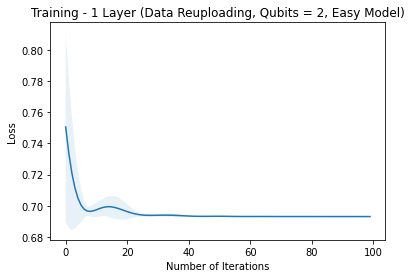

In [64]:
import matplotlib.pyplot as plt
groen = np.array([0,208,0])/255
stddevs =[]
averages =[]
sd = np.std(loss, axis=0)
av = np.average(loss, axis=0)
plt.plot(range(100), av)
plt.fill_between(range(100), av+np.array(sd), av-np.array(sd), alpha=0.1)
stddevs.append(sd)
averages.append(av)

plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Training - 1 Layer (Data Reuploading, Qubits = 2, Easy Model)")